# Prediction using supervised machine learning 

# <span style='color:Blue'> Linear regression </span>

Linear regression is a statistical method for modeling relationships between a dependent variable with a given set of independent variables.  
In order to provide a basic understanding of linear regression, we start with the most basic version of linear regression,  Simple linear regression.

# <span style='color:Blue'>Simple  Linear regression </span>

Simple linear regression is an approach for predicting a response using a single feature.  
In this regression task we will predict the percentage of marks that a student is expected to score based up on the number of   hours they studied.  
This is a simple linear regression task as it involves just two variables.

### Author : Jalal Alaeddine

In [1]:
# importing necessary libraries 

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
# reading  data from url link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

# get the first 5 rows
data.head()



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#  information about our data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# detection for null and missing values.
data.isna().sum()


Hours     0
Scores    0
dtype: int64

In [5]:
#  descriptive statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# shape of our data
data.shape

(25, 2)

In [7]:
# change noun of our coluns to: x for Hours and y for Scores
df=data.set_axis(['x', 'y'], axis = 1)


Text(0, 0.5, 'Percentage Score')

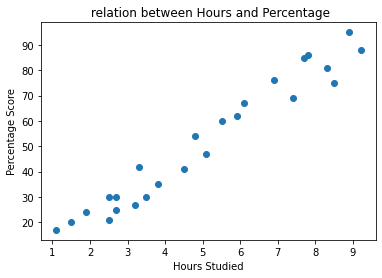

In [8]:
# data visualisation 
plt.scatter(df['x'],df['y'])
plt.title(' relation between Hours and Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

#### conclusion : From the graph we see positive linear relation between the number of hours studied and percentage of score.if the hour of studied increasing the percentage score increase .

In [9]:
# view correlation between houurs studied and percentage score 
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### conclusion : we see that there is a hight positive  correlation between two variables  scores and hours "0.97"

# Preparing data

In [19]:
df.head()


,x,y
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
# divide data into attributes and labels 
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 
print('shape of x',x.shape)
print('shape of y',y.shape)







shape of x (25, 1)
shape of y (25,)


In [22]:
# split data set into training and testing using train_test_split method 
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test=train_test_split(x,y,test_size=0.2)
# test_size indicate how much data want for our test data 
print('x train set:',X_train.shape)
print('x test set:',X_test.shape)
print('y train set:',y_train.shape)
print('y test set:',y_test.shape)


x train set: (20, 1)
x test set: (5, 1)
y train set: (20,)
y test set: (5,)


Text(0.5, 1.0, 'Test set')

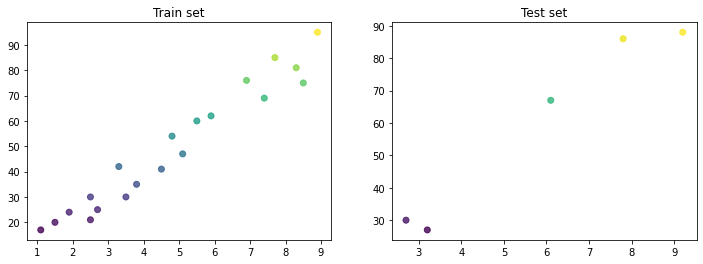

In [23]:
# visualisation of test and train data 
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train,y_train, c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(1,2,2)
plt.scatter(X_test,y_test,c=y_test, alpha=0.8)
plt.title('Test set')

# select model and train it 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# create object of class LinearRegression
model=LinearRegression()
# training model
model.fit(X_train,y_train)
# score of our model
model.score(X_train,y_train) 


0.9496259180591748

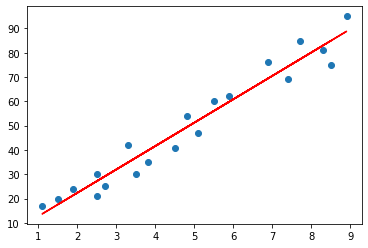

In [26]:
# visualisation 
nouvely=model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,nouvely,c='r')



# Making Predictions

##### Now that we have trained our algorithms it is time to make some predictions

In [31]:
# prediction based in our test data
pred_y=model.predict(X_test)
pred_y


array([33.89828859, 29.08351725, 61.82396233, 91.67554461, 78.19418487])

In [30]:
# view actual and predicted on test data in ordor to compare
daf = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})  
daf



,Actual,Predicted
0,27,33.898289
1,30,29.083517
2,67,61.823962
3,88,91.675545
4,86,78.194185


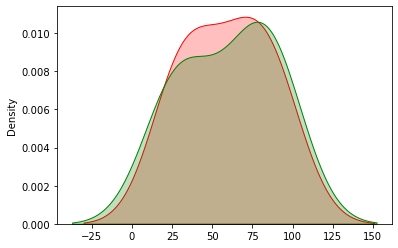

In [42]:
# visualisation actual vs predicted 
%matplotlib inline
import seaborn as sns
sns.kdeplot(data=pred_y,shade=True,color='red',label='Predicted',);
sns.kdeplot(data=y_test,shade=True,color='green',label='Actual');


In [46]:
# view accuracy of test and train data
print("train accuracy :" ,model.score(X_train,y_train)) 
print("test accuracy  :" ,model.score(X_test,y_test)) 


train accuracy : 0.9496259180591748
test accuracy  : 0.9572063164739447


In [77]:
# evaluate with our data 
# what will be predicted score if student studies 6,3 hrs/ day?
h=[[6.3]]
p=model.predict(h)
print('student who studies 6.3 hours is predicted to score',p[0] )


student who studies 6.3 hours is predicted to score 63.749870865012326


# evaluating model (metrics) 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 
#### Mean Absolute Error (MAE):
This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent.
#### Mean Squared Error (MSE)
The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize.

In [79]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y)) 
print('Mean squared  Error:', metrics.mean_squared_error(y_test, pred_y)) 


Mean Absolute Error: 4.894433748415161
Mean squared  Error: 29.931614005464077


#### conclusion:A smaller MSE 29.93 is preferred because it indicates that our data points are dispersed closely around its central moment (mean) 51.48 and  a smaller MAE 4.89 indicate that our model worked well 

# ----------------------- thank you for your attention-----------------------------------------------